<a href="https://colab.research.google.com/github/a-woodbury/RxVision/blob/master/Notebooks/2RxID15_model7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Environment Prep

### Package Import

In [2]:
#! pip install keras_metrics
#! pip install imgaug
#! pip install pandas_datareader

In [1]:
import imageio
import imgaug as ia

import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import os
import sys
import warnings
warnings.filterwarnings('ignore')
#!{sys.executable} -m pip install opencv-python

import time
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

#import tensorflow as tf
#from tensorflow import keras

import scipy
from PIL import Image
from scipy import ndimage

#import tensorflow as tf
#from tensorflow import keras
import tensorflow.keras 
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
#import keras_metrics
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.applications.resnet import ResNet50
from keras.callbacks import CSVLogger

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV, validation_curve 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline
#from tensorflow.keras import get_default_graph

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# This code has been tested with TensorFlow 1.6
#import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(123)

# Transfer learning with VGG16
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn import metrics
import seaborn as sns

from numpy import loadtxt
from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.2.0
Running on TPU  ['10.74.107.26:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.74.107.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.74.107.26:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### Functions

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

## Data Prep

### Data import

In [0]:
%load_ext tensorboard
#import tensorflow as tf
import datetime

In [0]:
!rm -rf ./logs/ 

In [0]:
# typdict = {'NDC':'str'}
# df = pd.read_csv('../Data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
# df = df.dropna()
# df.DRUG = df.DRUG.str.upper()
# df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
# df['FILETYPE'] = df.FILENAME.str[-4:]
# df = df[df.FILETYPE != '.WMV']
# df['MANUFACTURER'] = df.NDC.str[:5]

In [3]:
df = pd.read_csv('/content/drive/My Drive/RxID2/Data/rxid15.csv')
df

,Unnamed: 0,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE,NDC_prod
0,2946,9033102,1,PillProjectDisc58/images/CB4CEJKI72-2IAAF8SPNK...,C3PI_Reference,CLEOCIN 75MG,PillProjectDisc58,images,CB4CEJKI72-2IAAF8SPNK-YD6QHSBHE.JPG,.CR2,90331
1,2947,9033102,1,PillProjectDisc95/images/MJ8SIXGLA!IDK6QKOJQ8N...,C3PI_Reference,CLEOCIN 75MG,PillProjectDisc95,images,MJ8SIXGLA!IDK6QKOJQ8N5DOBZIKHE.JPG,.CR2,90331
2,2949,9033102,1,PillProjectDisc107/images/XW27OGQ!GSTCS6SVCFSE...,C3PI_Test,CLEOCIN 75MG,PillProjectDisc107,images,XW27OGQ!GSTCS6SVCFSE6F!WHA7PYT.JPG,.JPG,90331
3,2950,9033102,1,PillProjectDisc13/images/9CLLUNVVKAJ4Y!Q0R_4_H...,C3PI_Test,CLEOCIN 75MG,PillProjectDisc13,images,9CLLUNVVKAJ4Y!Q0R_4_H0I4EVZG5C.JPG,.JPG,90331
4,2951,9033102,1,PillProjectDisc17/images/B18QCJP3ZMIWFPGXJZ4R3...,C3PI_Test,CLEOCIN 75MG,PillProjectDisc17,images,B18QCJP3ZMIWFPGXJZ4R3I-OL2GR6Z-.JPG,.JPG,90331
...,...,...,...,...,...,...,...,...,...,...,...
602,127776,68180047901,1,PillProjectDisc42/images/BP4V9ZT0LMIB4BO872E-W...,MC_COOKED_CALIBRATED_V1.2,SIMVASTATIN,PillProjectDisc42,images,BP4V9ZT0LMIB4BO872E-WK025340X84.JPG,.PNG,681800479
603,127777,68180047901,1,PillProjectDisc51/images/BXRU3YZEHJU82Z4XML43I...,MC_COOKED_CALIBRATED_V1.2,SIMVASTATIN,PillProjectDisc51,images,BXRU3YZEHJU82Z4XML43IK7X1JWYWH7.JPG,.PNG,681800479
604,127778,68180047901,1,PillProjectDisc72/images/CN_3M1A3P5IO95ONJAKUI...,MC_COOKED_CALIBRATED_V1.2,SIMVASTATIN,PillProjectDisc72,images,CN_3M1A3P5IO95ONJAKUIFJYQC18Y9_.JPG,.PNG,681800479
605,127779,68180047901,1,PillProjectDisc83/images/CY8E7A05V71HWIUH2IQOZ...,MC_COOKED_CALIBRATED_V1.2,SIMVASTATIN,PillProjectDisc83,images,CY8E7A05V71HWIUH2IQOZYMM-2BJSD8.JPG,.PNG,681800479


In [0]:
data ='/content/drive/My Drive/RxID2/Data/RxID2_split'
test_folder = '/content/drive/My Drive/RxID2/Data/RxID2_split/test'
train_folder = '/content/drive/My Drive/RxID2/Data/RxID2_split/train'
val_folder = '/content/drive/My Drive/RxID2/Data/RxID2_split/validation'
rw_folder = '/content/drive/My Drive/RxID/RxID15/Realworld images'

---

## model - Acc: 0.65

- dropout
- 100 epochs

In [27]:
BATCH_SIZE = 32
IMG_SHAPE  = 128 
EPOCHS = 125
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     brightness_range=(.5,1.5),
                                     shear_range=0.2,
                                     #channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     fill_mode="nearest",
                                     zoom_range=0.35).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)

Found 71 images belonging to 15 classes.
Found 75 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [0]:
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest")

In [25]:
model = models.Sequential(name='model7')

model.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model.add(layers.MaxPooling2D((3, 3)))


model.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.05))

model.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.005))

model.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model.add(layers.MaxPooling2D((3, 3))) 

model.add(layers.Flatten())
model.add(layers.Dense(15, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

Model: "model7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 768)     21504     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 42, 42, 768)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 42, 42, 1024)      7078912   
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 1024)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 512)       4719104   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 512)         0    

In [10]:
%cd /content/drive/My Drive/RxID/Notebooks

/content/drive/My Drive/RxID/Notebooks


In [28]:
csv_logger = CSVLogger('../Models/hist{}.log'.format(model.name), separator=',', append=False)


checkpoint = ModelCheckpoint("../Models/{}.h5".format(model.name), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit(train_generator,
                    epochs=EPOCHS,
                    validation_data=val_generator,
                    callbacks=[checkpoint,early,csv_logger],
                    verbose=1,
                    use_multiprocessing=True)

Epoch 1/125
10/10 [==============================] - 35s 3s/step - loss: 2.4043 - acc: 0.1700 - val_loss: 2.7764 - val_acc: 0.2000

Epoch 00001: val_acc improved from -inf to 0.20000, saving model to ../Models/model7.h5
Epoch 2/125
10/10 [==============================] - 31s 3s/step - loss: 2.2298 - acc: 0.2033 - val_loss: 2.7418 - val_acc: 0.2800

Epoch 00002: val_acc improved from 0.20000 to 0.28000, saving model to ../Models/model7.h5
Epoch 3/125
10/10 [==============================] - 31s 3s/step - loss: 2.2593 - acc: 0.2167 - val_loss: 2.5415 - val_acc: 0.3200

Epoch 00003: val_acc improved from 0.28000 to 0.32000, saving model to ../Models/model7.h5
Epoch 4/125
10/10 [==============================] - 31s 3s/step - loss: 2.2596 - acc: 0.2000 - val_loss: 3.5097 - val_acc: 0.1467

Epoch 00004: val_acc did not improve from 0.32000
Epoch 5/125
10/10 [==============================] - 32s 3s/step - loss: 2.1791 - acc: 0.2667 - val_loss: 2.4518 - val_acc: 0.4000

Epoch 00005: val_acc

---

In [0]:
model = load_model('../Models/model7.h5')
model_val_results = model.evaluate(val_generator)

In [29]:
model_val_results = model.evaluate(val_generator)
modelacc = model_val_results[1]
model.summary()
modelacc

3/3 [==============================] - 7s 2s/step
Model: "model7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 768)     21504     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 42, 42, 768)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 42, 42, 1024)      7078912   
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 1024)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 1024)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 512)       4719104   
_________________________________________________________________
max_poolin

0.5866666436195374

In [0]:
class_size =  int(val_generator.samples / len(val_generator.class_indices))

In [0]:
hist = pd.read_csv('../Models/histmodel7.log', sep=',', engine='python')

In [0]:
len(hist), epochs_range

(15, range(0, 125))

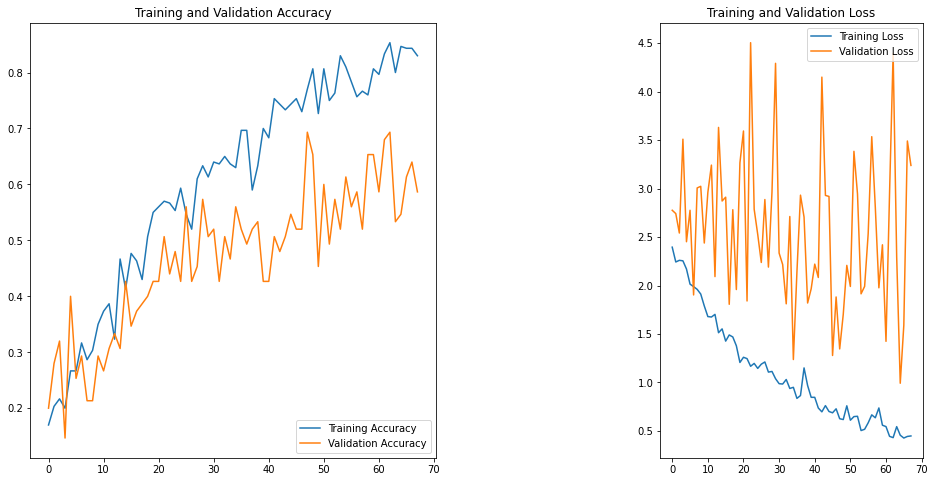

In [33]:
acc = hist['acc']
val_acc = hist['val_acc']

loss = hist['loss']
val_loss = hist['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(0,len(hist)), acc, label='Training Accuracy')
plt.plot(range(0,len(hist)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 3)
plt.plot(range(0,len(hist)), loss, label='Training Loss')
plt.plot(range(0,len(hist)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('{}_AccLoss.png'.format(model.name))
plt.show()


[Errno 2] No such file or directory: '../../Notebooks'
/home/jupyter/RxID2/Notebooks


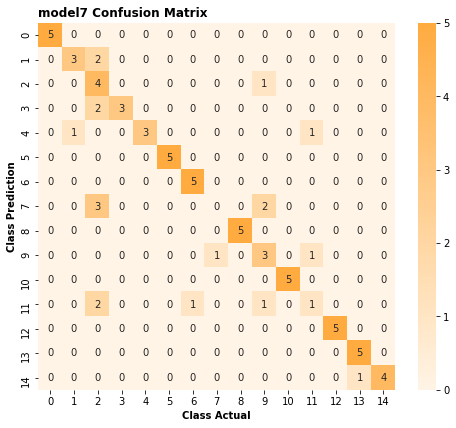

In [0]:
%cd ../../Notebooks
labels = list((val_generator.class_indices).values())
pred = model.predict(val_generator)
y_pred=np.argmax(pred,axis=1)
y_true = val_generator.classes

cf_matrix = metrics.confusion_matrix(y_true, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(8,6.75))  
pal = sns.light_palette("#ffab40", as_cmap=True)
sns.heatmap(cf_matrix, annot=True,cmap=pal,ax=ax)
plt.ylabel('Class Prediction', fontweight='bold')
plt.xlabel('Class Actual', fontweight='bold')
plt.title('{} Confusion Matrix'.format(model.name), fontweight='bold', loc='left')
plt.savefig('../Images/{}_conf'.format(model.name))

In [0]:
print(metrics.classification_report(y_true, y_pred, labels=labs))

In [0]:
%cd ../Data/Download

/home/jupyter/RxID2/Data/Download


In [0]:
dfx = df[df.TYPE == 'MC_COOKED_CALIBRATED_V1.2']
samplesdfx = dfx.groupby(['NDC']).min().reset_index()
sampleslist2 = samplesdfx.FILE.tolist()
#len(sampleslist2)

samplefiles = []
for image in sampleslist2:
    smplsplt = image.split('/')
    keep = smplsplt[-1]
    keep = keep[:-4]
    keep= keep +('.JPG')
    samplefiles.append(keep)

    
#for file in os.listdir():
drgimg = os.listdir()
images = []
for file in samplefiles:
    data = plt.imread(file)
    images.append(data)

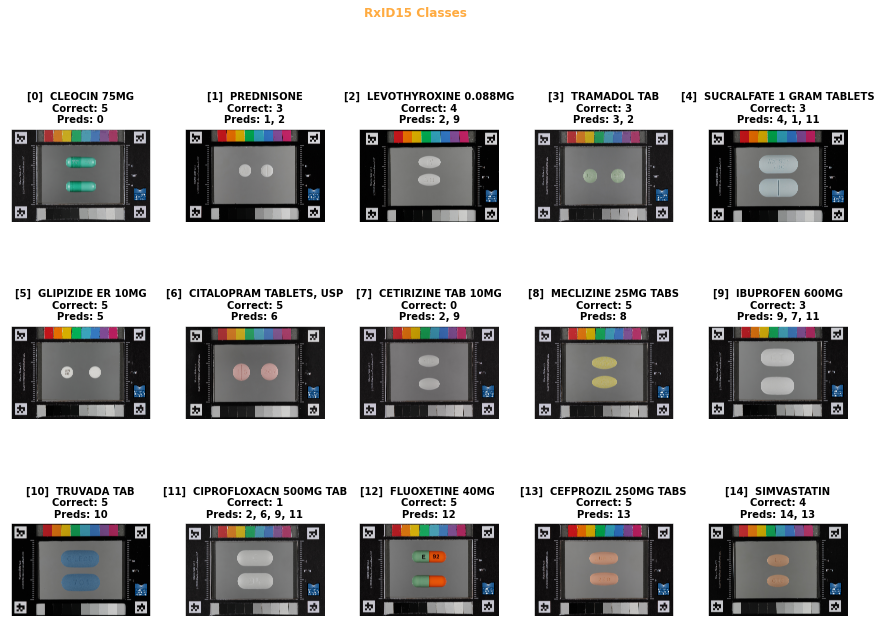

In [0]:
plt.figure(figsize=(15,15))
columns = 5
for i, image in enumerate(images): # iterate through the images in the array 'images'
    k = i * class_size
    j = (i + 1) * class_size
    trues = int(y_true[k:j].mean())
    preds = list(y_pred[k:j]).count(trues)
    #print(trues,preds)
    lst = list(y_pred[k:j])
    preddict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0}
    for pred in lst:
        preddict[pred] +=1
    preddict = {k: v for k, v in sorted(preddict.items(), key=lambda item: item[1], reverse=True)}
    for k, v in list(preddict.items()):
        if v == 0:
            del preddict[k]
    predlist = list(preddict.keys())
    #predmost = list(set(lst))
    dname = df.DRUG[df.FILENAME.str.contains(samplefiles[i][:-4])].tolist()[0] # get the drug name from the df for the image in index i 
    dndc = df.NDC[df.FILENAME.str.contains(samplefiles[i][:-4])].tolist()[0] # get the NDC from the df for the image in index i 
    title = '[' + str(i) + '] ' + ' ' + dname + '\nCorrect: ' + str(preds) + '\nPreds: ' +  ', '.join(map(str,predlist)) # title for each subplot: class, drug name, and NDC
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.suptitle('RxID15 Classes',fontweight='bold',fontsize='large', color= '#ffab40')
    plt.subplots_adjust(hspace=0.2,wspace=0.25, top=.9, bottom=.2) # i believe this is the subplots spacing from each other and within the plot
    #plt.margins(tight=True) # not sure which margins this is impacting
    plt.title(title,fontweight='semibold',fontsize='10')
    plt.imshow(image)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    #plt.savefig('../../Images/{}_predictions.jpg'.format(model.name),format='jpg',quality=95,dpi=300, bbox='tight',pad_inches = 0) # bbox has always given me the output i wanted...

In [0]:
%cd ..

/home/jupyter/RxID2


In [0]:
%cd REALWORLD

/home/jupyter/RxID2/REALWORLD


In [0]:
import cv2

In [0]:
for pic in os.listdir():
    try:
        img = cv2.imread(pic)
        img = cv2.resize(img,(IMG_SHAPE,IMG_SHAPE))
        img = np.reshape(img,[1,IMG_SHAPE,IMG_SHAPE,3])
        classes = model.predict_classes(img)
        print(pic, classes)
    except:
        print('shit...')



61202797276__429A927A-75BB-4FDF-A6FA-5E962975D2C8.jpeg [10]
IMG_2383.JPG [10]
IMG_9580.jpeg [10]
IMG_9581.jpeg [13]
shit...
20200525_095337.jpg [10]
IMG_2394.JPG [10]
20200525_095323.jpg [9]
IMG_9524.jpeg [1]
IMG_2396.JPG [10]
IMG_9579.jpeg [10]
61202787257__BE77C86D-D8DD-4B15-82C2-9FC2459E7991.jpeg [10]
IMG_2395.JPG [10]
IMG_9535.jpeg [10]
61202785689__FEC08A02-77EE-48BA-80D2-6DE6E7E9299A.jpeg [10]
20200525_095443.jpg [10]
20200525_095455.jpg [10]
20200525_095417.jpg [10]
IMG_2381.JPG [0]
IMG_2377.JPG [0]
IMG_0557.jpeg [10]
61202779940__151E0A8A-EB33-4409-8D7F-9D4BBE8F3366.jpeg [10]
IMG_2389.JPG [10]
20200525_095240_1.jpg [10]
20200525_095333.jpg [10]
20200525_095240.jpg [10]
20200525_095435.jpg [10]
IMG_9510.jpeg [10]
IMG_2397.JPG [10]
IMG_9515.jpeg [10]
IMG_2385.JPG [10]
IMG_9531.jpeg [10]
IMG_2387.JPG [10]
IMG_9536.jpeg [4]
20200525_095351.jpg [10]
IMG_0554.jpeg [10]
IMG_2379.JPG [10]
20200525_095213.jpg [4]
IMG_9522.jpeg [10]


In [0]:
val_generator.class_indices

{'00009033102': 0,
 '00054472825': 1,
 '00093005801': 2,
 '00527134410': 3,
 '00591078005': 4,
 '00591084510': 5,
 '31722020701': 6,
 '45802091987': 7,
 '49884003501': 8,
 '55111068305': 9,
 '61958070101': 10,
 '65862007701': 11,
 '65862019430': 12,
 '68180040301': 13,
 '68180047901': 14}